In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import PIL
import pathlib
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
model = keras.models.load_model('../../models/rnc_image_classification_model')

### Now doing predictions

In [7]:
img_height = 200
img_width = 400

In [8]:
class_names = ['healthy_patients', 'sudden_death_patients']

In [9]:
lista_filenames = []

for i in range(1,16):
    lista_filenames.append(f'chf{i}')

In [10]:
df_unhealthy_final = pd.DataFrame(columns = ['score','class','probability_0','probability_1','both_proba','instant','patient','instant_s'],index = range(360))

In [11]:
unhealthy = list(pathlib.Path(f'../../data/interim/').glob('sudden_final/*'))
df_unhealthy = pd.DataFrame(columns = ['score','class','probability_0','probability_1','both_proba','instant','patient','instant_s'],index = range(len(unhealthy)))

In [12]:
for i in range(len(unhealthy)):
    img = keras.preprocessing.image.load_img(
    unhealthy[i], target_size=(img_height, img_width)
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    score_healthy = float(score[0])
    score_unhealthy = float(score[1])

    both_scores = [score_healthy,score_unhealthy]

    df_unhealthy['score'].iloc[i] = 100 * np.max(score)
    df_unhealthy['class'].iloc[i] = class_names[np.argmax(score)]

    df_unhealthy['probability_0'].iloc[i] = float(score[0])
    df_unhealthy['probability_1'].iloc[i] = float(score[1])
    df_unhealthy['both_proba'].iloc[i] = both_scores

In [15]:
df_unhealthy['true'] = 'sudden_death_patients'

df_unhealthy.loc[df_unhealthy['true'] != df_unhealthy['class'],'correct_class'] = 'incorrect'
df_unhealthy.loc[df_unhealthy['true'] == df_unhealthy['class'],'correct_class'] = 'correct'

In [20]:
barplot = df_unhealthy.groupby('correct_class')['class'].count().reset_index()

In [24]:
barplot['class'] = (barplot['class'] / barplot['class'].sum()) * 100

(array([0, 1]), [Text(0, 0, 'correct'), Text(1, 0, 'incorrect')])

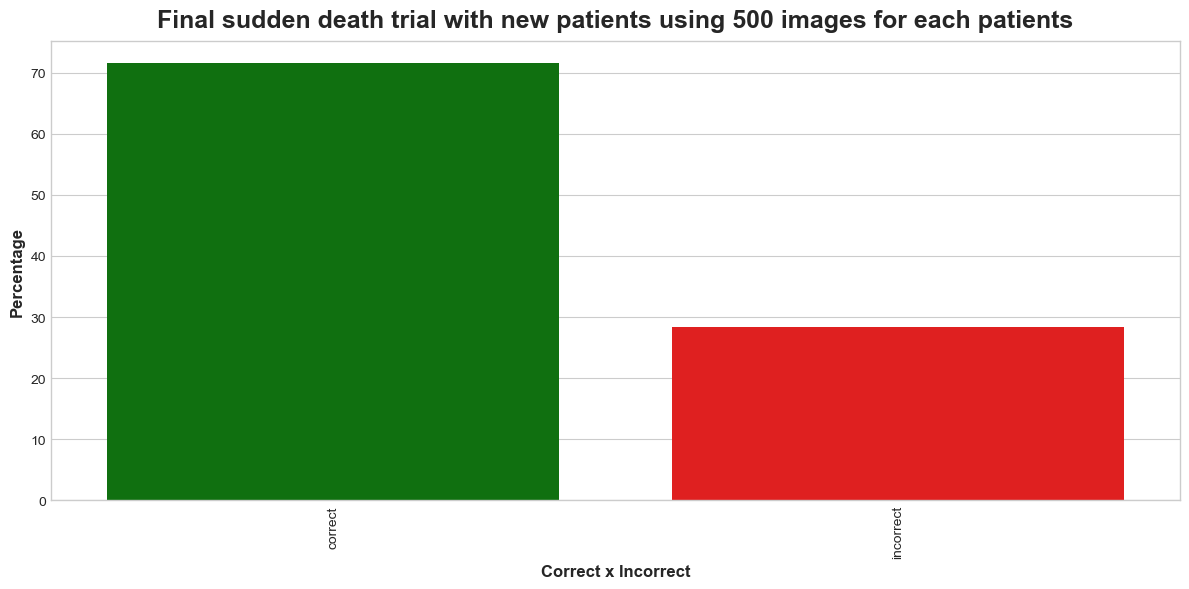

In [32]:
plt.figure(figsize=[12,6],dpi = 100)
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

colors = ['green','red']
bar_plot = sns.barplot(x='correct_class',y='class',data=barplot,palette=colors)
plt.title(f'Final sudden death trial with new patients using 500 images for each patients')
plt.xlabel('Correct x Incorrect')
plt.ylabel('Percentage')
plt.xticks(rotation=90)